In [2]:
using LinearAlgebra, RowEchelon, LaTeXStrings, Latexify, SymPy, LAcode
# First time use of LAcode: from LAcode.jl execute the pkg command  ] dev --local "."
#title( "The QR Decomposition", sz=30, color="darkred")
using PyCall
itikz=pyimport("itikz")
nM   =pyimport("itikz.nicematrix")
jinja=pyimport("jinja2");

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">The QR Decomposition</strong><br>
</div>

# 1. Gram-Schmidt and the QR Decomposition

## 1.1 Reformulate Gram-Schmidt: $\mathbf{A = Q R}$

##### **The Gram-Schmidt Equations**

<div style="float:left;width:85%;background-color:#F2F5A9;">

**The Gram-Schmidt Procedure**
$$
\begin{align}
w_1 & = \color{red}{v_1} && & \quad q_1 = \frac{1}{\lVert w_1 \rVert} w_1 \\
w_2 & = \color{red}{v_2} - Proj^\perp_{ span\{ w_1      \} } \; \color{red}{v_2} &=&\ \color{red}{v_2} - \frac{\color{red}{v_2} \cdot w_1}{w_1 \cdot w_1} w_1& \quad q_2 = \frac{1}{\lVert w_2 \rVert} w_2 \\ 
w_3 & = \color{red}{v_3} - Proj^\perp_{ span\{ w_1, w_2 \} } \; \color{red}{v_3} & =&\ \color{red}{v_3} - \frac{\color{red}{v_3} \cdot w_1}{w_1 \cdot w_1} w_1
                                                                 - \frac{\color{red}{v_3} \cdot w_2}{w_2 \cdot w_2} w_2 & \quad q_3 = \frac{1}{\lVert w_3 \rVert} w_3 \\   
 \dots& \dots\dots\dots\dots\dots\dots & &\dots\dots\dots\dots\dots\dots\dots & \\
w_k & = \color{red}{v_k} - Proj^\perp_{ span\{ w_1, w_2, \dots w_{k-1} \} } \; \color{red}{v_k} &&
& \quad q_k = \frac{1}{\lVert w_k \rVert} w_k 
\end{align}
$$
</div>

<div style="float:left;width:38%;;padding-right:3cm;">

**Remark:**
Scaling $w$ does not affect the projection terms:
$$
\begin{align}
& \tilde{w} & =&\;\; \color{red}{\alpha}\; w \\
& \frac{\tilde{w} \cdot v}{\tilde{w} \cdot \tilde{w}} \tilde{w} &=&\; \frac{\color{red}{\alpha}\; w \cdot v}{\color{red}{\alpha^2}\; w \cdot w} \;\color{red}\alpha\; w 
\end{align}
$$
</div>
<div style="float:left;width:40%;height:2.5cm;border:1px solid black;padding:10pt;">

We can **replace the $w_i$ in the Gram-Schmidt equations<br>$\quad$  by $q_i$ for example.**
</div>

##### **The QR Decomposition**

<div style="float:left;width:55%;padding-right:0.5cm;">

Let us rewrite these equations: solve for $v_i$ in terms of the $q_i$:

$$
\begin{align}
\color{red}{v_1} && = &\; \lVert w_1 \rVert\; \color{red}{q_1}  \\
\color{red}{v_2} & = w_2 + Proj^\perp_{ span\{ w_1      \} } \; {v_2} &=&\ \frac{{v_2} \cdot q_1}{q_1 \cdot q_1}\; \color{red}{q_1} + \lVert w_2 \rVert\; \color{red}{q_2} \\ 
\color{red}{v_3} & = w_3 + Proj^\perp_{ span\{ w_1, w_2 \} } \;  {v_3} & =&\ \frac{{v_3} \cdot q_1}{w_1 \cdot q_1}\; \color{red}{q_1}
                                                                 + \frac{{v_3} \cdot q_2}{q_2 \cdot q_2}\; \color{red}{q_2} + \lVert w_3 \rVert\; \color{red}{q_3}  \\   
 \dots& \dots\dots\dots\dots\dots\dots & &\dots\dots\dots\dots\dots\dots\dots & \\
\end{align}
$$
</div>
<div style="float:left;width:35%;height:4.6cm;padding-left:1cm;border-left:2px solid black;">

$\quad$ We see  $\color{red}{A = Q R}, \quad $ where

$$
\begin{align}
A &= \begin{pmatrix} v_1 & v_2 & \dots & v_{\color{red}{n}} \end{pmatrix}\\
Q &= \begin{pmatrix} q_1 & q_2 & \dots q_{\color{red}k} \end{pmatrix} \\
R &= \begin{pmatrix} \lVert w_1 \rVert & \frac{{v_2} \cdot q_1}{q_1 \cdot q_1} & \dots \\
                        0 & \lVert w_2 \rVert & \dots \\
                        \dots & \dots & \dots
\end{pmatrix}
\end{align}
$$
</div>

<div style="float:left;width:55%;height:3.8cm;background-color:#F2F5A9;">

**Theorem:** Let $A$ be a matrix in $\mathbb{R}^{M \times N}$.<br>
$\quad\quad$ **Then $A$ has a factorization $A = Q R$** such that
* $Q^t Q = I$
* $R$ is an **upper triangular** matrix
* If the columns of $A$ are linearly independent, **$R$ is invertible**
</div>
<div style="float:right;width:35%;">

**Remark:**
* Gram-Schmidt constructs these matrices.
* The non-zero entries of $R$ are the coefficients computed for the projections

$$
A = Q R \Rightarrow \color{red}{R = Q^t A}
$$
</div>

## 1.2 Computation of $A = Q R$

### 1.2.1 Naive Method

<div style="float:left;width:50%;height:4.4cm;background-color: transparent;">
<style type="text/css">
.tftable {font-size:12px;color:#333333;width:12cm;border-width: 1px;border-color: #729ea5;border-collapse: collapse;}
.tftable th {font-size:12px;background-color:#acc8cc;border-width: 1px;padding: 8px;border-style: solid;border-color: #729ea5;text-align:left;}
.tftable tr {background-color:#ffffff;}
.tftable td {font-size:12px;border-width: 1px;padding: 8px;border-style: solid;border-color: #729ea5;}
</style>

**Matrix Definitions**
<table class="tftable" border="1">
<tr><th style="width:5cm;">Matrix</th><th>Comment</th></tr>
<tr><td>$A = ( v_1\ v_2\ \dots v_k )$</td><td>The initial vectors $v_i$</td></tr>
<tr><td>$W = ( w_1\ w_2\ \dots w_k )$</td><td>The orthogonal vectors $w_i$</td></tr>
<tr><td>$S = (W^t W)^{-\frac{1}{2}}$</td><td>The diagonal matrix with entries $\frac{1}{\lVert w_i \rVert}$</td></tr>
</table>
</div><div style="float:right;width:40%;padding:5px;">

**Layout of the Computations**
<div style="border:1px solid black;padding:10px;"><!-- ----------------------------------------------->
    $$\begin{align}
   &                                                     & \left( \begin{array}{r|r}\ \quad\quad A & \quad\; W \end{array}\right) & \\
   & \left(\begin{array}{r} \quad W^t \end{array}\right) & \left( \begin{array}{r|r}\;\;\; W^t A   & W^t W \end{array}\right) &\\
\left(\begin{array}{r} S \end{array}\right)
   & \left(\begin{array}{r}\ \color{red}{S\ W^t} \end{array}\right)   & \left( \begin{array}{r|r}\ \color{red}{S W^t A} & \;\quad\quad \end{array}\right) & \\
\end{align}$$
</div></div>

#### **Example 1**

<!-- A = [1 1 2; 2 1 0; -1 1 -1]'
W = [1 1 2; 3 1 -2; -2 4 -1]'
qr_mat_rep, qr_mat_fmt, qr_submatrix_locs  = nM.qr_layout(A,W)

cmds = itikz.build_commands_dict(use_xetex=true,use_dvi=false,crop=true)
h = itikz.fetch_or_compile_svg( jinja.Template( nM.GE_TEMPLATE ).render(
        preamble=nM.preamble*raw"\NiceMatrixOptions{cell-space-top-limit = 1pt,cell-space-bottom-limit = 1pt}",
        extension=nM.extension,
        mat_rep=qr_mat_rep,
        mat_format=qr_mat_fmt,
        submatrix_locs=qr_submatrix_locs,# pivot_locs=pivot_locs, txt_with_locs=txt_with_locs
        ),
        prefix="test_",
        working_dir="/tmp/itikz",
        debug=false,
        keep_file="Figs/qr_layout_1",
        tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"], nexec=4 );

display(HTML("<div style=\"float:center;width:100%;text-align:left;\">
     <strong style=\"height:15px;color:blue;font-size:12pt;\">Example</strong>
     </div>"))
h
-->
<div style="float:left;width:60%;">
<img src="Figs/qr_layout_1.svg">
</div><div style="float:left;width:30%;padding:20px">
<strong>Result:</strong>  $\mathbf A = Q R$

* $\color{red}{Q^t = S W^t}$
* $\color{red}{R}\; = Q^t A = \color{red}{S W^t A}$
</div>

##### **Computation**

###### **Compute $\mathbf{w_1}$**

> Set $w_1 = v_1$, compute all dot products

###### **Compute $\mathbf{w_2}$**

> $\begin{align}
w_2 = v_2 - \frac{v_2 \cdot w_1}{w_1 \cdot w_1} w_1 \;\;  =\ \begin{pmatrix} 2 \\ 1 \\ 0 \end{pmatrix} - \frac{3}{6} \begin{pmatrix} 1 \\ 1 \\ 2 \end{pmatrix}
\;\; =\ \frac{1}{2} \begin{pmatrix} 4 -1 \\ 2 - 1\\ -2 \end{pmatrix} \;\; = \ \frac{1}{2} \begin{pmatrix}  3 \\ 1 \\ -2\end{pmatrix}
\end{align}$
$\quad$ Use $\quad \tilde{w}_2 = \begin{pmatrix} 3 \\ 1 \\ -2 \end{pmatrix}$

###### **Compute** $\mathbf{w_3}$

> $\begin{align}
w_3 = v_3 - \frac{v_3 \cdot w_1}{w_1 \cdot w_1} w_1  - \frac{v_3 \cdot w_2}{w_2 \cdot w_2} w_2 \;\;  =\ \begin{pmatrix} -1 \\ 1 \\ -1 \end{pmatrix}
- \frac{-2}{6} \begin{pmatrix} 1 \\ 1 \\ 2 \end{pmatrix}
- \frac{0}{14} \begin{pmatrix} 3 \\ 1 \\ -2 \end{pmatrix}
\;\; =\ \frac{1}{3} \begin{pmatrix} -3 +1 \\ 3 + 1\\ -3+2 \end{pmatrix} \;\; = \ \frac{1}{3} \begin{pmatrix} -2 \\ 4 \\ -1 \end{pmatrix}
\end{align}$
>
> Use $\quad \tilde{w}_3 = \begin{pmatrix} -2 \\ 4 \\ -1 \end{pmatrix}$

###### **Scale the $\mathbf{w_i}$ to unit length**

The scale factors are in $W^t W$:$\qquad$  $\lVert w_1 \rVert^2 =6,\;\lVert w_2 \rVert^2 =14,\;\lVert w_3 \rVert^2 = 21$ 

#### **Built-in Error Check: Example 1 with Numerical Error**

<div style="float:left;width:50%;padding:20px">

**The computation proceeds one $w_i$ vector at a time,**<br>
$\quad\quad$ filling in the matrix multiplications as we go.
    
We may **take advantage of scaling to avoid fractions**, i.e., replace<br>
$\quad\quad$ $w_i$ with $\tilde{w}_i = \alpha w_i$<br>
$\quad\quad$ in the layout, and for the computations.
</div><div style="float:right;width:40%;padding:20px">

$\color{blue}{\textbf{Error Check:}}$
* $W^t A$ and $S W^t A$ are **upper triangular**
* $W^t W$ is diagonal
</div>

HTML{String}("<div style=\"float:center;width:100%;text-align:left;\">\n     <strong style=\"height:15px;color:blue;font-size:12pt;\">Example: Error in the computation</strong>\n     </div>")

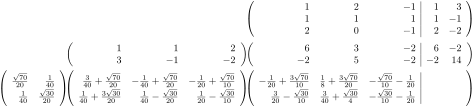

In [15]:
A = [1 1 2; 2 1 0; -1 1 -1]'
W = [1 1 2; 3 -1 -2;]'
qr_mat_rep, qr_mat_fmt, qr_submatrix_locs  = nM.qr_layout(A,W)

cmds = itikz.build_commands_dict(use_xetex=true,use_dvi=false,crop=true)
h = itikz.fetch_or_compile_svg( jinja.Template( nM.GE_TEMPLATE ).render(
        preamble=nM.preamble*raw"\NiceMatrixOptions{cell-space-top-limit = 1pt,cell-space-bottom-limit = 1pt}",
        extension=nM.extension,
        mat_rep=qr_mat_rep,
        mat_format=qr_mat_fmt,
        submatrix_locs=qr_submatrix_locs,# pivot_locs=pivot_locs, txt_with_locs=txt_with_locs
        ),
        prefix="test_",
        working_dir="/tmp/itikz",
        debug=false,
        keep_file="Figs/qr_layout_1_error",
        tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"], nexec=4 );

display(HTML("<div style=\"float:center;width:100%;text-align:left;\">
     <strong style=\"height:15px;color:blue;font-size:12pt;\">Example: Error in the computation</strong>
     </div>"))
h

#### **Example 2**

<!-- 
A = [1 1 -1 1; 1 -2 -1 1; -1 1 2 -1]'
W = [1 1 -1 1; 1 -3 -1 1; 1 0 2 1]'
qr_mat_rep, qr_mat_fmt, qr_submatrix_locs  = nM.qr_layout(A,W)

cmds = itikz.build_commands_dict(use_xetex=true,use_dvi=false,crop=true)
h = itikz.fetch_or_compile_svg( jinja.Template( nM.GE_TEMPLATE ).render(
        preamble=nM.preamble*raw"\NiceMatrixOptions{cell-space-top-limit = 1pt,cell-space-bottom-limit = 1pt}",
        extension=nM.extension,
        mat_rep=qr_mat_rep,
        mat_format=qr_mat_fmt,
        submatrix_locs=qr_submatrix_locs,# pivot_locs=pivot_locs, txt_with_locs=txt_with_locs
        ),
        prefix="qr_",
        working_dir="/tmp/itikz",
        debug=false,
        keep_file="Figs/qr_layout_2",
        tex_program=cmds["tex_program"], svg_converter=cmds["svg_converter"],svg_crop=cmds["svg_crop"], nexec=4 );
h
-->
<div style="float:left;width:60%;">
<img src="Figs/qr_layout_2.svg">
</div><div style="float:left;width:30%;padding:20px">
<strong>Result:</strong>  $\mathbf A = Q R$

* $\color{red}{Q^t = S W^t}$
* $\color{red}{R}\; = Q^t A = \color{red}{S W^t A}$
</div>

##### **Setup the Layout, Fill in $A= (v_1, v_2 \dots )$**

> $A = \left(
\begin{array}{ccc}
1 & 1 & -1 \\
1 & -2 & 1 \\
-1 & -1 & 2 \\
1 & 1 & -1 \\
\end{array}
\right)$

##### **Fill in $w_1$, Compute all dot products**

> $w_1 = \left(\begin{array}{r} 1 \\ 1 \\ -1 \\ 1 \end{array}\right),\quad$ so $\quad w_1^t A = \begin{pmatrix} 4 & 1 & -3 \end{pmatrix},\quad w_1^t w_1 = ( 4 )$

##### **Compute and Fill in $w_2,$ Compute all dot products**

> $w_2 = v_2 - \frac{v_2 \cdot w_1}{w_1 \cdot w_1} w_1 = \frac{3}{4}\left(\begin{array}{r} 1 \\ -3 \\ -1 \\ 1 \end{array}\right), \quad$ we will use $\quad \tilde{w}_2 = \left(\begin{array}{r} 1 \\ -3 \\ -1 \\ 1 \end{array}\right)\quad$ in lieu of $w_2.\:$<br>
$\quad\quad$ Fill $\tilde{w}_2$ into the layout, and carry out all the computations this makes possible<br>
$\quad\quad$ and **verify the expected 0 values:**
>
> $\tilde{w}^t_2 A = \begin{pmatrix} \color{red}0 & 9 & -7 \end{pmatrix}, \quad \tilde{w}_2 \cdot ( w_1 \;\; \tilde{w}_2 ) = ( \color{red}0 \;\; 12 )$

##### **Compute and Fill in $w_3$ and Computate Remaining Dot Products**

> $w_3 = v_3 - \frac{v_3 \cdot w_1}{w_1 \cdot w_1} w_1  - \frac{v_3 \cdot w_2}{w_2 \cdot w_2} w_2 =
\frac{1}{3}\begin{pmatrix} 1 \\ 0 \\ 2 \\ 1 \end{pmatrix}, \quad$ we will use $\quad \tilde{w}_3 = \begin{pmatrix} 1 \\ 0 \\ 2 \\ 1 \end{pmatrix}\quad$ in lieu of $w_3.\:$<br>
$\quad\quad$ Fill $\tilde{w}_3$ into the layout, carry out all the computations this makes possible<br>
$\quad\quad$ and verify the expected 0 values:
>
> $\tilde{w}^t_3 A = \begin{pmatrix} \color{red}0 & \color{red}0 & 2 \end{pmatrix}, \quad \tilde{w}_3 \cdot ( w_1 \;\; \tilde{w}_2 \;\; w_3 ) = ( \color{red}0 \;\; \color{red}0 \;\; 6 )$

##### **Fill in $S,$ Compute $Q^t$ and $R$**

$$S = \left(\begin{array}{rrr}
\frac{1}{2} & 0 & 0 \\
0 & \frac{1}{6} \, \sqrt{3} & 0 \\
0 & 0 & \frac{1}{6} \, \sqrt{6}
\end{array}\right), \quad
Q^t = \left(\begin{array}{rrrr}
\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} \\
\frac{1}{6} \, \sqrt{3} & -\frac{1}{2} \, \sqrt{3} & -\frac{1}{6} \, \sqrt{3} & \frac{1}{6} \, \sqrt{3} \\
\frac{1}{6} \, \sqrt{6} & 0 & \frac{1}{3} \, \sqrt{6} & \frac{1}{6} \, \sqrt{6}
\end{array}\right), \quad
R = \left(\begin{array}{rrr}
2 & \frac{1}{2} & -\frac{3}{2} \\
0 & \frac{3}{2} \, \sqrt{3} & -\frac{7}{6} \, \sqrt{3} \\
0 & 0 & \frac{1}{3} \, \sqrt{6}
\end{array}\right)
$$

### 1.2.2 Refinement of the Method

The Gram Schmidt equations as written have **poor numerical properties.**<br>
Practical Implementations introduce some **highly successful** modifications
* **Immediately remove $\mathbf{q_i}$ components** from the remaining $v_i$ vectors
* **Reorder the remaining $\mathbf{v_i}$ vectors** at each step  (full pivoting)

### 1.2.3 Alternate Methods

There are two methods we will briefly mention:

they start from matrix $A = \left( v_1 \; v_2 \dots \right)$<br>
$\quad$ and compute $R$ using orthonormal transformations:
* **Householder Reflections**
* **Givens Rotations**

# 2. QR and the Normal Equation

## 2.1 Multiplication by $W^t$ rather than $A^t$

<div style="float:left;padding-right:1cm;">
We had arrived at the normal equation by multiplying $$A x = b - b_\perp$$
$\quad$ with $A^t$ to remove the $b_\perp$ term.

We only need any one solution $x$.<br>
$\quad\quad$ As we did before, assume that $A$ is full-column rank,<br>
$\quad\quad$ (i.e., remove any linearly dependent colums of the original matrix problem)
    
Since $\mathscr{C}\left(A^t \right) = \mathscr{C}\left( W^t \right)$,
$\;\;$ multiplication by $W^t$ similarly wipes out $b_\perp$
</div>
<img style="float:center;border:1px solid black;" width=200 src="Figs/OrthoProjection_into_plane.png">

----

<div style="float:left;width:50%;height:4.2cm;padding:5pt;background-color:#F2F5A9;">

**Theorem:** Let $A$ in $\mathbb{R}^{M \times N}$ with reduced QR factorization $A = Q R$.<br>
    $\quad\quad$ Then $ A^t A x = A^t b \Leftrightarrow \color{red}{ R x = Q^t b }$

<br>

**Remark:** This theorem states that we can use the $Q R$ decomposition<br>
    $\quad\quad$ to solve the normal equation.
</div>
<div style="float:right;width:35%;">
Assume $A$ has full column rank, so $A = Q R$,<br>$\quad$ where $R$ (and hence $R^t$) is invertible:
$$A = Q R \Leftrightarrow A^t = R^t Q^t$$
<br>
$$\begin{align}
A x = b  &\Rightarrow A^t A x = A^t b \\
         & \Leftrightarrow R^t Q^t Q R x = R^t Q^t b \\
         & \Leftrightarrow Q^t Q R x = Q^t b \\
         & \Leftrightarrow R x = Q^t b
\end{align}$$
<div>

**Remark**<br>
$\quad$ for hand computations, it is easier to back out $S$.

$\quad$ Since $R = S W^t A, \;\; Q^t = S W^t$, we have $R x = Q^1 b \Leftrightarrow \color{red}{ W^t A x = W^t b}$

## 2.1 Example

> Compute the orthogonal projection matrix onto
> $S = span \left\{\; a_1 = \left(\begin{array}{r} 1 \\  1 \\  1 \\  2 \end{array}\right),\;\;
a_2 = \left(\begin{array}{r} 1 \\ 1 \\ -2 \\ 1 \end{array}\right) \; \right\}
$
>
> and use it to decompose
$\; b = \begin{pmatrix} 2\\ 1\\ 1\\ 0 \end{pmatrix}$ into orthogonal components in $S$ and $S^\perp$



<div style="float:left;width:50%;">

>$ $
    <img src="Figs/qr_layout_3.svg" style="width:95%;">
</div><div style="float:left;width:40%;height:4cm;padding-left:1cm;">
$W^t A x = W^t b$ $\;\;$ becomes<br>
$\qquad \left(
\begin{array}{rr}
7 & -2 \\
0 & 15 \\
\end{array}
\right) \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} =  \begin{pmatrix} 4 \\ 5 \end{pmatrix}
$
  <br><br>  
which has solution $\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} =  \frac{1}{3} \begin{pmatrix} 2 \\ 1 \end{pmatrix}$
</div>

> As before, $b_\parallel = A x = \begin{pmatrix}1\\1\\0\\1\end{pmatrix},\;\;$ and $\;\;$
$b_\perp = b - b_\parallel = \left(\begin{array}{r}1 \\ 0 \\ 1 \\ -1 \end{array}\right)$

# 3. Take Away

* We have reformulated the **Gram-Schmidt Procedure** to show that it yields $A = Q R$
    * The columns of $Q$ are **orthonormal**:  $Q^t Q = I$
    * The matrix $R$ switches the orthonormal vectors $q_i$ to the corresponding columns $a_i$

* This decomposition is **widely used** in numerical computations
* Solving $R x = Q^t b$ is an alternative method for solving the normal equation